Epoch 1/100
9/9 - 1s - 102ms/step - loss: 0.0885 - val_loss: 0.0478
Epoch 2/100
9/9 - 0s - 5ms/step - loss: 0.0407 - val_loss: 0.0436
Epoch 3/100
9/9 - 0s - 6ms/step - loss: 0.0270 - val_loss: 0.0612
Epoch 4/100
9/9 - 0s - 5ms/step - loss: 0.0230 - val_loss: 0.0377
Epoch 5/100
9/9 - 0s - 5ms/step - loss: 0.0216 - val_loss: 0.0410
Epoch 6/100
9/9 - 0s - 7ms/step - loss: 0.0196 - val_loss: 0.0445
Epoch 7/100
9/9 - 0s - 5ms/step - loss: 0.0186 - val_loss: 0.0424
Epoch 8/100
9/9 - 0s - 6ms/step - loss: 0.0177 - val_loss: 0.0455
Epoch 9/100
9/9 - 0s - 6ms/step - loss: 0.0168 - val_loss: 0.0443
Epoch 10/100
9/9 - 0s - 5ms/step - loss: 0.0161 - val_loss: 0.0458
Epoch 11/100
9/9 - 0s - 7ms/step - loss: 0.0153 - val_loss: 0.0463
Epoch 12/100
9/9 - 0s - 5ms/step - loss: 0.0147 - val_loss: 0.0475
Epoch 13/100
9/9 - 0s - 6ms/step - loss: 0.0140 - val_loss: 0.0475
Epoch 14/100
9/9 - 0s - 6ms/step - loss: 0.0134 - val_loss: 0.0493
Epoch 15/100
9/9 - 0s - 6ms/step - loss: 0.0127 - val_loss: 0.0493
Ep

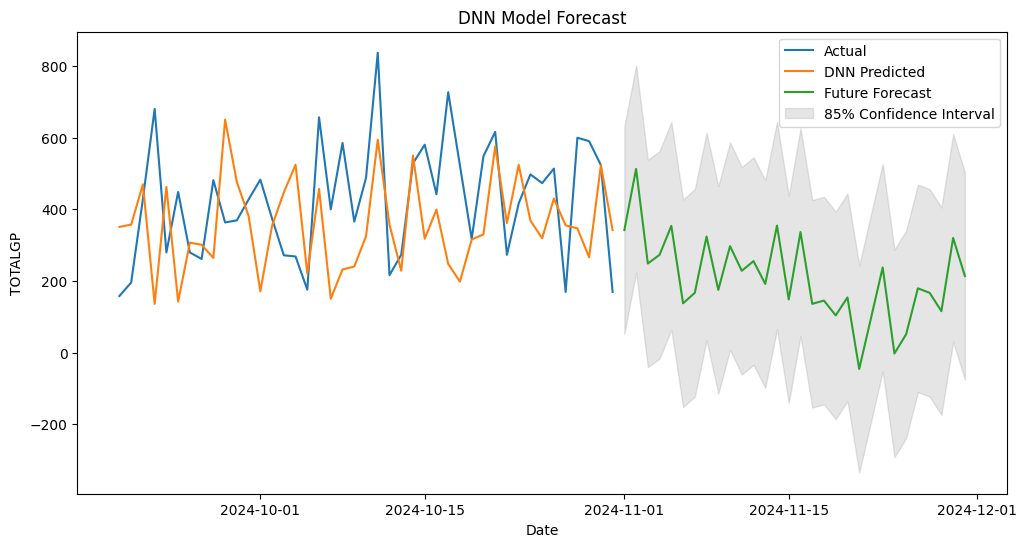

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


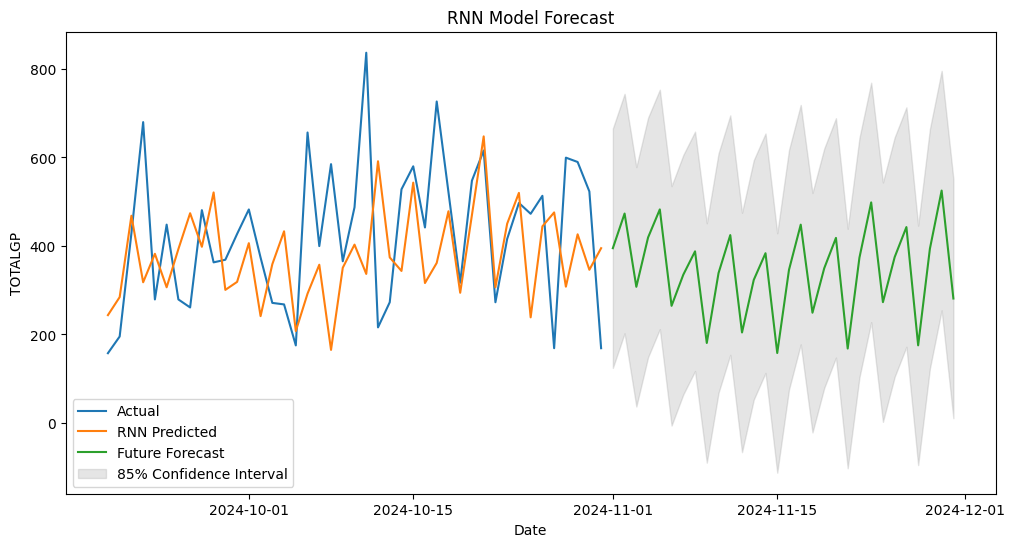

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


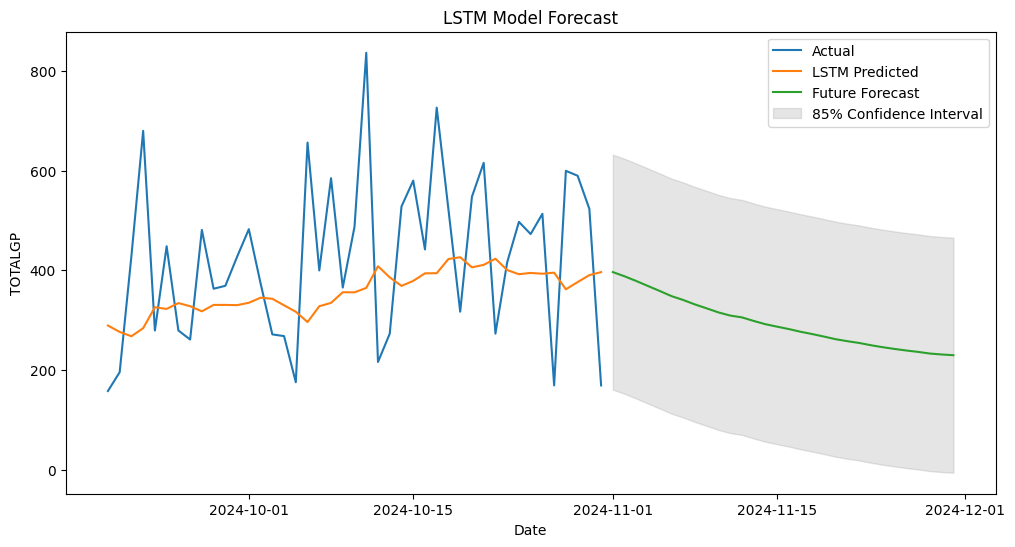

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


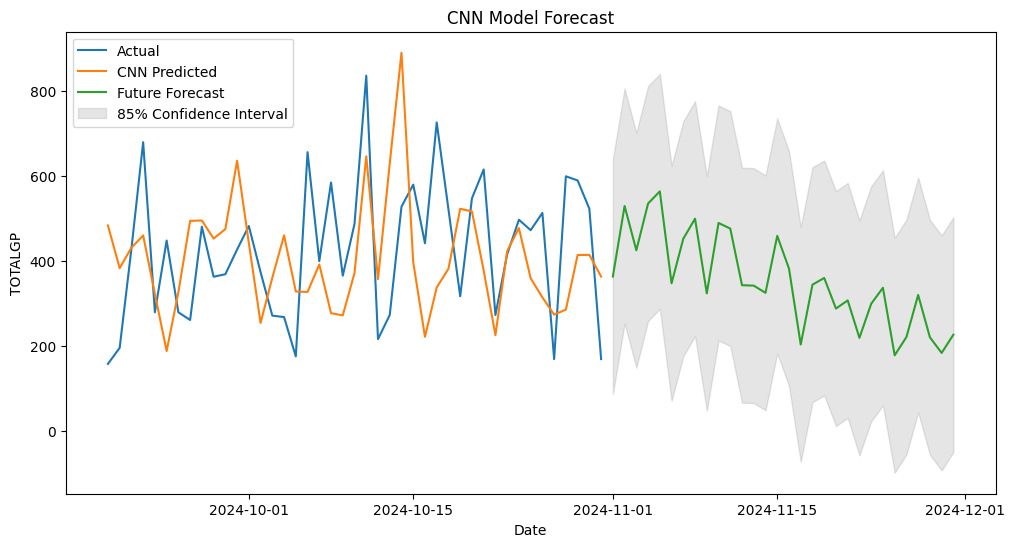

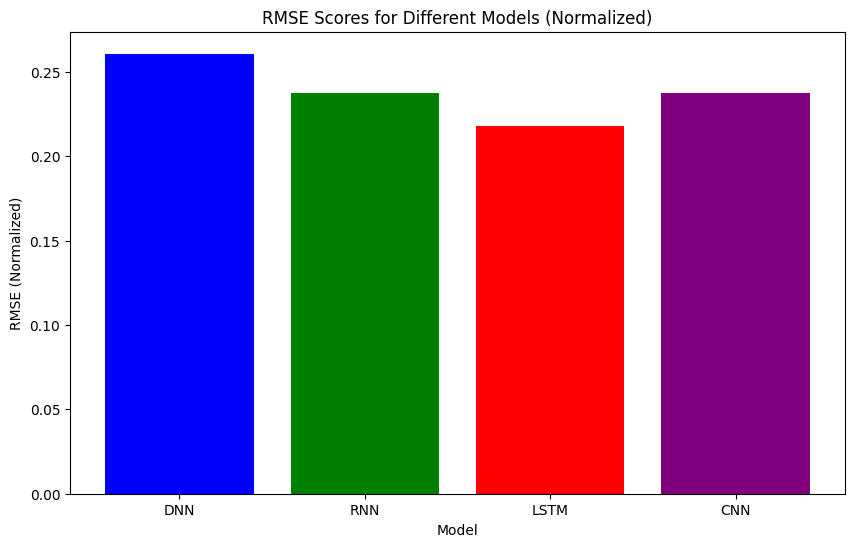

RMSE Scores (Normalized):
DNN: 0.26067596981100305
RNN: 0.23762119225475117
LSTM: 0.2177140418773664
CNN: 0.2372083401550986
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


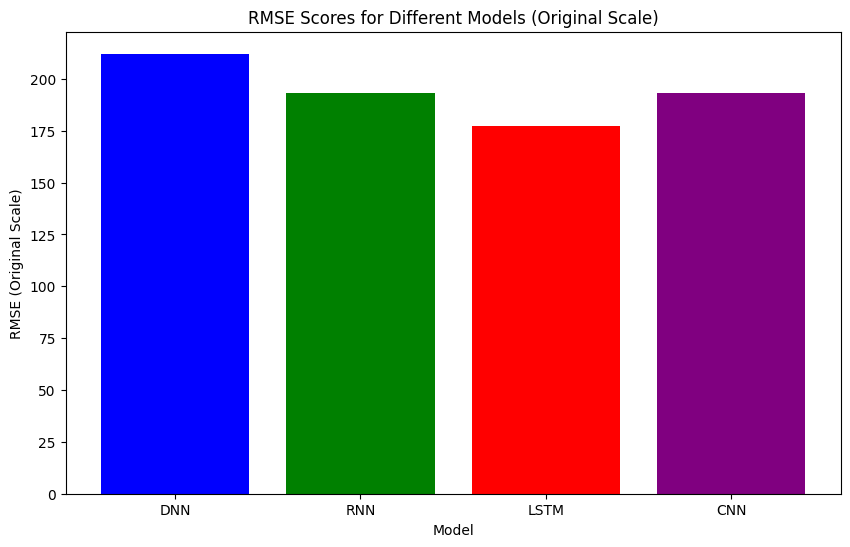

RMSE Scores (Original Scale):
DNN: 212.0963970247294
RNN: 193.33811152993644
LSTM: 177.1408609361662
CNN: 193.00219579699228

Future forecasted values with DNN (Original Scale):
2024-11: 341.64 (Lower Bound: 52.11, Upper Bound: 631.18)
2024-11: 512.35 (Lower Bound: 222.82, Upper Bound: 801.89)
2024-11: 248.35 (Lower Bound: -41.18, Upper Bound: 537.88)
2024-11: 272.77 (Lower Bound: -16.76, Upper Bound: 562.30)
2024-11: 353.54 (Lower Bound: 64.01, Upper Bound: 643.07)
2024-11: 137.34 (Lower Bound: -152.20, Upper Bound: 426.87)
2024-11: 166.51 (Lower Bound: -123.02, Upper Bound: 456.04)
2024-11: 323.68 (Lower Bound: 34.15, Upper Bound: 613.21)
2024-11: 174.72 (Lower Bound: -114.82, Upper Bound: 464.25)
2024-11: 296.94 (Lower Bound: 7.41, Upper Bound: 586.47)
2024-11: 228.09 (Lower Bound: -61.44, Upper Bound: 517.62)
2024-11: 255.11 (Lower Bound: -34.42, Upper Bound: 544.64)
2024-11: 191.48 (Lower Bound: -98.05, Upper Bound: 481.01)
2024-11: 354.38 (Lower Bound: 64.85, Upper Bound: 643.91)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten, Input # type: ignore
from sklearn.model_selection import ParameterGrid
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import random

def reset_random_seeds():
    os.environ['PYTHONHASHSEED'] = str(2)
    tf.random.set_seed(2)
    np.random.seed(2)
    random.seed(2)

# Reset seeds for reproducibility
reset_random_seeds()

def create_missing_dates(self, dataframe):
        dataframe['date'] = pd.to_datetime(dataframe['date'])

        dataframe.set_index('date', inplace=True)

        full_date = pd.date_range(start=dataframe.index.min(), end=dataframe.index.max(), freq='D')

        new_dates_df = dataframe.reindex(full_date)

        new_dates_df = new_dates_df.rename_axis('date').reset_index()

        return new_dates_df

def patch_null_values(self, dataframe):
    dataframe = dataframe.ffill().bfill()

    return dataframe

superstore = pd.read_csv('D:/My Documents/Downloads/FINALS DSPYTHON/superstoreForecasting.csv')
superstore['date'] = pd.to_datetime(superstore['date'], format='%d/%m/%Y')
date = superstore['date']
superstore.set_index(date, inplace=True)
sales = superstore['sales']

scaler = MinMaxScaler()
superstore['sales'] = scaler.fit_transform(superstore[['sales']])

train_size = int(0.7 * len(superstore))
train_data, test_data = superstore['sales'][:train_size], superstore['sales'][train_size:]

def create_sequences(data, seq_length):
    sequences, target = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

seq_length = 30
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

# Reshape for RNN, LSTM, CNN (not needed for DNN)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Input # type: ignore

def build_dnn():
    model = Sequential()
    model.add(Input(shape=(seq_length,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

def build_rnn():
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))
    model.add(SimpleRNN(30, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm():
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))
    model.add(LSTM(30, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

def build_cnn():
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and evaluate models
models = {
    'DNN': build_dnn(),
    'RNN': build_rnn(),
    'LSTM': build_lstm(),
    'CNN': build_cnn()
}

rmse_scores = {}
future_predictions = {}

for name, model in models.items():
    if name == 'DNN':
        model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)
        y_pred = model.predict(X_test)
    elif name == 'RNN':
        model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=2)
        y_pred = model.predict(X_test_rnn)
    elif name == 'LSTM':
        model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)
        y_pred = model.predict(X_test_lstm)
    elif name == 'CNN':
        model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=2)
        y_pred = model.predict(X_test_cnn)


    # Check for NaN or infinite values in y_test and y_pred
    print(f"Checking for NaN or infinite values in {name} predictions...")
    print(f"y_test: NaN values: {np.isnan(y_test).sum()}, Infinite values: {np.isinf(y_test).sum()}")
    print(f"y_pred: NaN values: {np.isnan(y_pred).sum()}, Infinite values: {np.isinf(y_pred).sum()}")

    if np.isnan(y_test).sum() > 0 or np.isinf(y_test).sum() > 0:
        raise ValueError(f"y_test contains NaN or infinite values.")
    if np.isnan(y_pred).sum() > 0 or np.isinf(y_pred).sum() > 0:
        raise ValueError(f"y_pred contains NaN or infinite values.")

    # Calculate RMSE for the test set predictions in normalized scale
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred.flatten()))
    rmse_scores[name] = rmse_test
    
    # Inverse transform the RMSE to the original scale
    rmse_test_original_scale = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(y_pred.reshape(-1, 1))))
    
    # Calculate residuals and standard deviation in normalized scale
    residuals = y_test - y_pred.flatten()
    std_error = np.std(residuals)
    
    # Calculate 95% confidence interval using z-score in normalized scale
    
    # 70% - 1.036
    # 75% - 1.15
    # 80% - 1.282
    # 85% - 1.44
    # 90% - 1.645
    # 95% - 1.96  

    z_score = 1.44
    margin_error = z_score * std_error
    
    # Extend predictions for 1 year (12 MONTHSALESs) in normalized scale
    future_steps = 30
    if name == 'DNN':
        future_input = X_test[-1]
    else:
        future_input = X_test_rnn[-1]
    
    extended_predictions = []
    for i in range(future_steps):
        if name == 'DNN':
            future_pred = model.predict(np.expand_dims(future_input, axis=0))  # Predict the next value
            extended_predictions.append(future_pred[0, 0])  # Append the prediction to the list
            future_input = np.append(future_input[1:], future_pred)  # Update input sequence for next prediction
        else:
            future_pred = model.predict(np.expand_dims(future_input, axis=0))  # Predict the next value
            extended_predictions.append(future_pred[0, 0])  # Append the prediction to the list
            future_input = np.append(future_input[1:], future_pred, axis=0)  # Update input sequence for next prediction
            future_input = future_input.reshape(seq_length, 1)  # Ensure future_input has correct shape
    
    # Create a date range for future predictions
    last_date = superstore.index[-1]
    future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='D')[1:]
    
    # Calculate upper and lower bounds in normalized scale
    upper_bound = np.array(extended_predictions) + margin_error
    lower_bound = np.array(extended_predictions) - margin_error
    
    # Inverse transform the future predictions and bounds to original scale
    extended_predictions_original_scale = scaler.inverse_transform(np.array(extended_predictions).reshape(-1, 1)).flatten()
    upper_bound_original_scale = scaler.inverse_transform(np.array(upper_bound).reshape(-1, 1)).flatten()
    lower_bound_original_scale = scaler.inverse_transform(np.array(lower_bound).reshape(-1, 1)).flatten()
    
    future_predictions[name] = (future_dates, extended_predictions_original_scale, upper_bound_original_scale, lower_bound_original_scale)
    
    print(f"{name} Test RMSE in normalized scale: {rmse_test}")
    print(f"{name} Test RMSE in original scale: {rmse_test_original_scale}")

    # Plot the results
for name, model in models.items():
    if name == 'DNN':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_rnn)
        
    future_dates, extended_predictions_original_scale, upper_bound_original_scale, lower_bound_original_scale = future_predictions[name]
    
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index[seq_length:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(test_data.index[seq_length:], scaler.inverse_transform(y_pred), label=f'{name} Predicted')
    plt.plot(future_dates, extended_predictions_original_scale, label='Future Forecast')
    plt.fill_between(future_dates, lower_bound_original_scale, upper_bound_original_scale, color='gray', alpha=0.2, label='85% Confidence Interval')
    plt.xlabel('Date')
    plt.ylabel('Money')
    plt.title(f'{name} Model Forecast')
    plt.legend()
    plt.show()

# Plot RMSE Scores
model_names = list(rmse_scores.keys())
rmse_values = list(rmse_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('RMSE (Normalized)')
plt.title('RMSE Scores for Different Models (Normalized)')
plt.show()

print("RMSE Scores (Normalized):")
for model_name, rmse_score in rmse_scores.items():
    print(f"{model_name}: {rmse_score}")

# Plot RMSE Scores in original scale
model_names = list(rmse_scores.keys())
rmse_values_original = [np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(models[model_name].predict(X_test).reshape(-1, 1)))) if model_name == 'DNN' else np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(models[model_name].predict(X_test_rnn).reshape(-1, 1)))) for model_name in model_names]

plt.figure(figsize=(10, 6))
plt. bar(model_names, rmse_values_original, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('RMSE (Original Scale)')
plt.title('RMSE Scores for Different Models (Original Scale)')
plt.show()

print("RMSE Scores (Original Scale):")
for model_name, rmse_score in zip(model_names, rmse_values_original):
    print(f"{model_name}: {rmse_score}")

# Print all future forecasted values with dates in original scale
for name, (future_dates, extended_predictions_original_scale, upper_bound_original_scale, lower_bound_original_scale) in future_predictions.items():
    print(f"\nFuture forecasted values with {name} (Original Scale):")
    for date, value, lb, ub in zip(future_dates, extended_predictions_original_scale, lower_bound_original_scale, upper_bound_original_scale):
        print(f"{date.strftime('%Y-%m')}: {value:.2f} (Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f})")